## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.13.0
Keras version: 2.13.1


## Q2. Load the Wine Quality dataset and explore its dimensions.
## Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("data/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## No null Values

In [17]:
categorical_variables = ['quality']

### `quality` is only catagorical value Here

In [31]:
mapping = {"bad" : 0,
       "good" : 1 }

In [32]:
## encoded catagorical colunm with mapppings
df["quality"] = df["quality"].map(mapping)

In [28]:
df[categorical_variables] 

,quality
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1594,NaN
1595,NaN
1596,NaN
1597,NaN


## Q4. Separate the features and target variables from the dataset.

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [44]:
## Independent column
X = df.iloc[:, :-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [41]:
## Dependent column
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

## Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting datasets
print("Training data size:", X_train.shape[0])
print("Validation data size:", X_val.shape[0])
print("Test data size:", X_test.shape[0])

Training data size: 959
Validation data size: 320
Test data size: 320


## Q6. Scale the dataset using an appropriate scaling technique.

In [47]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform your validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


# Create a sequential neural network model
model = Sequential()

# Add the input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add the first hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the second hidden layer
model.add(Dense(units=16, activation='relu'))

# Add the output layer with a single neuron for binary classification (sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
24/24 [==============================] - 2s 20ms/step - loss: 0.6838 - accuracy: 0.5906 - val_loss: 0.6236 - val_accuracy: 0.6719
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.6320 - accuracy: 0.6532 - val_loss: 0.6163 - val_accuracy: 0.6771
Epoch 3/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6352 - accuracy: 0.6336 - val_loss: 0.6161 - val_accuracy: 0.6875
Epoch 4/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6320 - accuracy: 0.6389 - val_loss: 0.6066 - val_accuracy: 0.6719
Epoch 5/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6403 - accuracy: 0.6167 - val_loss: 0.6097 - val_accuracy: 0.6667
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.6260 - accuracy: 0.6506 - val_loss: 0.6049 - val_accuracy: 0.6875
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.6297 - val_loss: 0.6041 - val_accuracy: 0.6771
Epoch 8/10
24/24 [=

## Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [49]:
from keras.models import Sequential

# Create a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add the first hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the second hidden layer
model.add(Dense(units=16, activation='relu'))

# Add the output layer with a single neuron for binary classification (sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))


## Q9. Print the summary of the model architecture.

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [53]:

from keras.optimizers import Adam  # Importing the Adam optimizer

# Compile the model with the specified loss function, optimizer, and metrics
model.compile(
    loss='binary_crossentropy',  # Specify the loss function for binary classification
    optimizer=Adam(learning_rate=0.001),  # Use the Adam optimizer with a specific learning rate
    metrics=['accuracy']  # Include accuracy as a metric to monitor during training
)


## Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [56]:
from keras.optimizers import Adam

# Compile the model with the specified loss function, optimizer, and metrics
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Now you can fit the model to the training data
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
24/24 [==============================] - 2s 19ms/step - loss: 0.7284 - accuracy: 0.6089 - val_loss: 0.6494 - val_accuracy: 0.6146
Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6365 - accuracy: 0.6389 - val_loss: 0.6175 - val_accuracy: 0.6406
Epoch 3/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6332 - accuracy: 0.6402 - val_loss: 0.6272 - val_accuracy: 0.6250
Epoch 4/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6381 - accuracy: 0.6284 - val_loss: 0.6693 - val_accuracy: 0.6198
Epoch 5/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6316 - accuracy: 0.6336 - val_loss: 0.6091 - val_accuracy: 0.6458
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.6428 - val_loss: 0.6009 - val_accuracy: 0.6615
Epoch 7/10
24/24 [==============================] - 0s 6ms/step - loss: 0.6323 - accuracy: 0.6271 - val_loss: 0.6297 - val_accuracy: 0.6250
Epoch 8/10
24/24 [=

## Q13. Obtain the model's parameters (weights and biases).

In [57]:
model_parameters = []
for layer in model.layers:
    layer_parameters = layer.get_weights()
    model_parameters.append(layer_parameters)

# Print the parameters for each layer
for i, layer_params in enumerate(model_parameters):
    print(f"Layer {i + 1} Parameters:")
    for j, param in enumerate(layer_params):
        print(f"  Parameter {j + 1}:")
        print(param)

Layer 1 Parameters:
  Parameter 1:
[[ 0.2250414   0.11576231 -0.24057426  0.03780895  0.18583372 -0.08370121
   0.01236799 -0.07786337  0.01259957  0.2313629   0.03288782  0.26495662
   0.26489353  0.1770867   0.00546345  0.02092803 -0.28246132 -0.23206608
   0.03673083  0.22545406  0.03034223 -0.22185434 -0.0961802   0.00058626
   0.12325978  0.01576744 -0.22451101  0.01831082 -0.00060954  0.26591718
  -0.15720472  0.00136962  0.20677023 -0.12508832  0.07997742  0.25294682
  -0.055509    0.23091075 -0.12648973  0.17335847  0.07760607 -0.26581553
   0.20231964 -0.0458696   0.06317353  0.1714092  -0.01822504 -0.00413873
  -0.0492016   0.05150169 -0.2624388   0.06204374  0.16055611 -0.13904317
  -0.14834374 -0.02893551 -0.20691551 -0.11936964  0.2501621   0.23259649
   0.09943763 -0.1475431   0.22458018  0.19686575]
 [ 0.25791898  0.12751037 -0.06126732 -0.26331303 -0.20310634  0.03541599
  -0.10832134  0.16643691  0.05934308  0.15045536  0.26330778  0.07959056
  -0.19759841 -0.03488353 

## Q14. Store the model's training history as a Pandas DataFrame.

In [58]:
history_df = pd.DataFrame(history.history)

In [59]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.728362,0.608866,0.649383,0.614583
1,0.636507,0.638853,0.617496,0.640625
2,0.633228,0.640156,0.627248,0.625000
3,0.638110,0.628422,0.669302,0.619792
4,0.631593,0.633638,0.609101,0.645833
5,0.623584,0.642764,0.600911,0.661458
6,0.632346,0.627119,0.629676,0.625000
7,0.622059,0.644068,0.603816,0.661458
8,0.627569,0.633638,0.593545,0.677083
9,0.626961,0.655802,0.611527,0.640625


## Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

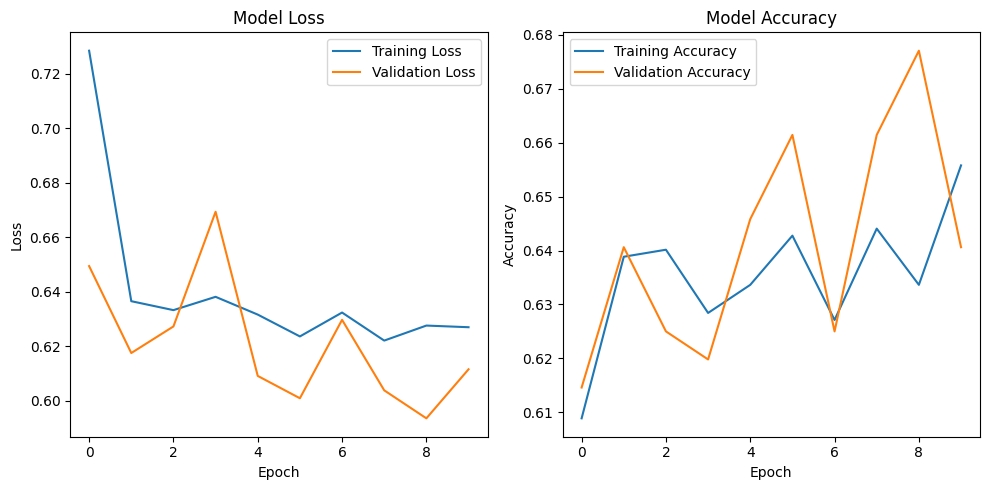

In [60]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
if 'val_loss' in history_df:
    plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history_df:
    plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your model and have 'model' as your trained model

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_binary)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


10/10 [==============================] - 0s 3ms/step
Accuracy: 0.615625
Precision: 0.6368715083798883
Recall: 0.6627906976744186
F1-Score: 0.6495726495726495
Confusion Matrix:
[[ 83  65]
 [ 58 114]]
